In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier



In [ ]:
# Load the dataset
df_train = pd.read_csv('UNSW_NB15_training-set.csv')
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')
df_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
df_test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
df_train = df_train.drop(['id','attack_cat'], axis=1)
df_test = df_test.drop(['id','attack_cat'], axis=1)

In [ ]:
# Encode categorical columns
label_encoder = preprocessing.LabelEncoder()
df_train['proto'] = label_encoder.fit_transform(df_train['proto'])
df_train['service'] = label_encoder.fit_transform(df_train['service'])
df_train['state'] = label_encoder.fit_transform(df_train['state'])

df_test['proto'] = label_encoder.fit_transform(df_test['proto'])
df_test['service'] = label_encoder.fit_transform(df_test['service'])
df_test['state'] = label_encoder.fit_transform(df_test['state'])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  int64  
 2   service            82332 non-null  int64  
 3   state              82332 non-null  int64  
 4   spkts              82332 non-null  float64
 5   dpkts              82332 non-null  float64
 6   sbytes             82332 non-null  float64
 7   dbytes             82332 non-null  float64
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  float64
 10  dttl               82332 non-null  float64
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  float64
 14  dloss              82332 non-null  float64
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  int64  
 2   service            175341 non-null  int64  
 3   state              175341 non-null  int64  
 4   spkts              175341 non-null  float64
 5   dpkts              175341 non-null  float64
 6   sbytes             175341 non-null  float64
 7   dbytes             175341 non-null  float64
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  float64
 10  dttl               175341 non-null  float64
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  float64
 14  dloss              175341 non-null  float64
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
df_train.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [ ]:
# Get a scaler object
scaler = MinMaxScaler()
for col in df_train.columns:
  print(col)
  df_train[col] = scaler.fit_transform(df_train[[col]])
  df_test[col] = scaler.fit_transform(df_test[[col]])

dur
proto
service
state
spkts
dpkts
sbytes
dbytes
rate
sttl
dttl
sload
dload
sloss
dloss
sinpkt
dinpkt
sjit
djit
swin
stcpb
dtcpb
dwin
tcprtt
synack
ackdat
smean
dmean
trans_depth
response_body_len
ct_srv_src
ct_state_ttl
ct_dst_ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
is_ftp_login
ct_ftp_cmd
ct_flw_http_mthd
ct_src_ltm
ct_srv_dst
is_sm_ips_ports
label


In [ ]:
df_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1.833334e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.0
1,1.333334e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.0
2,8.333335e-08,0.900000,0.0,0.666667,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,...,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0,0.0
3,1.000000e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,...,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.0
4,1.666667e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,...,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.900000,0.0,0.666667,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.016949,0.000000,0.0,0.0
82328,1.843502e-02,0.853846,0.0,0.500000,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.033898,0.016393,0.0,0.0
82329,0.000000e+00,0.046154,0.0,0.666667,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0
82330,0.000000e+00,0.046154,0.0,0.666667,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0


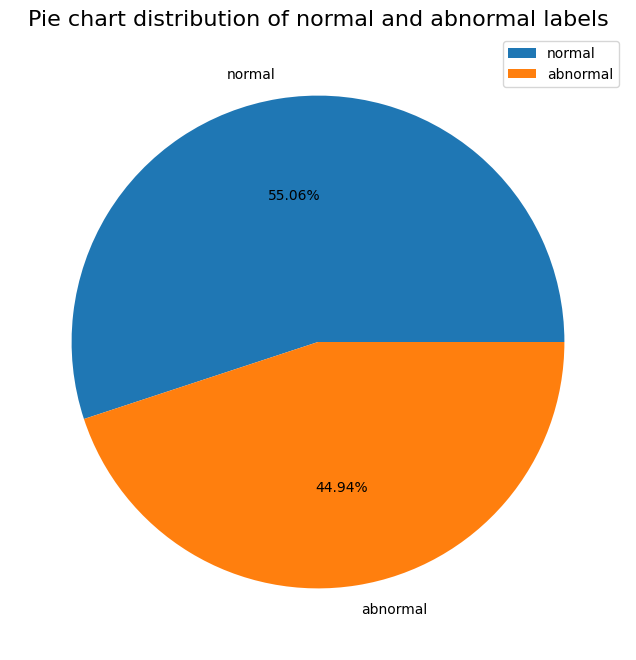

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df_train.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

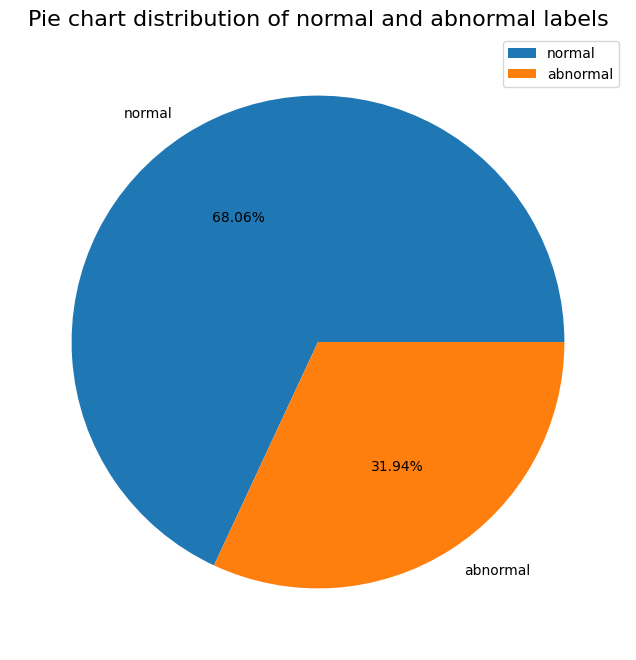

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df_test.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [ ]:
# Split the data into features and labels
X = df_train.drop(['label'], axis=1)
y = df_train['label']

# Split the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)

x_test = df_test.drop(['label'], axis=1)
y_test = df_test['label']

In [ ]:
# Build the neural network model
model_ann = Sequential()
model_ann.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model_ann.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/10
2059/2059 [==============================] - 13s 4ms/step - loss: 0.2169 - accuracy: 0.8985 - val_loss: 0.1631 - val_accuracy: 0.9305
Epoch 2/10
2059/2059 [==============================] - 10s 5ms/step - loss: 0.1530 - accuracy: 0.9357 - val_loss: 0.1561 - val_accuracy: 0.9327
Epoch 3/10
2059/2059 [==============================] - 10s 5ms/step - loss: 0.1357 - accuracy: 0.9445 - val_loss: 0.1224 - val_accuracy: 0.9519
Epoch 4/10
2059/2059 [==============================] - 9s 5ms/step - loss: 0.1224 - accuracy: 0.9511 - val_loss: 0.1376 - val_accuracy: 0.9413
Epoch 5/10
2059/2059 [==============================] - 9s 4ms/step - loss: 0.1173 - accuracy: 0.9526 - val_loss: 0.1365 - val_accuracy: 0.9467
Epoch 6/10
2059/2059 [==============================] - 10s 5ms/step - loss: 0.1150 - accuracy: 0.9531 - val_loss: 0.1182 - val_accuracy: 0.9534
Epoch 7/10
2059/2059 [==============================] - 10s 5ms/step - loss: 0.1108 - accuracy: 0.9548 - val_loss: 0.1137 - val_accu

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_cnn = create_model()

In [ ]:
# Train the model with early stopping
model_cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/10
2059/2059 [==============================] - 26s 9ms/step - loss: 0.7505 - accuracy: 0.8789 - val_loss: 0.3244 - val_accuracy: 0.9257
Epoch 2/10
2059/2059 [==============================] - 18s 9ms/step - loss: 0.2869 - accuracy: 0.9268 - val_loss: 0.2657 - val_accuracy: 0.9198
Epoch 3/10
2059/2059 [==============================] - 19s 9ms/step - loss: 0.2408 - accuracy: 0.9356 - val_loss: 0.2097 - val_accuracy: 0.9418
Epoch 4/10
2059/2059 [==============================] - 18s 9ms/step - loss: 0.2248 - accuracy: 0.9396 - val_loss: 0.1912 - val_accuracy: 0.9480
Epoch 5/10
2059/2059 [==============================] - 18s 9ms/step - loss: 0.2169 - accuracy: 0.9399 - val_loss: 0.1880 - val_accuracy: 0.9507
Epoch 6/10
2059/2059 [==============================] - 18s 9ms/step - loss: 0.2094 - accuracy: 0.9421 - val_loss: 0.2133 - val_accuracy: 0.9287
Epoch 7/10
2059/2059 [==============================] - 17s 8ms/step - loss: 0.2026 - accuracy: 0.9438 - val_loss: 0.1891 - val_ac

5480/5480 [==============================] - 10s 2ms/step
Accuracy:  0.8336726721074934
              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79     56000
         1.0       0.99      0.76      0.86    119341

    accuracy                           0.83    175341
   macro avg       0.83      0.87      0.83    175341
weighted avg       0.89      0.83      0.84    175341

[[55163   837]
 [28327 91014]]


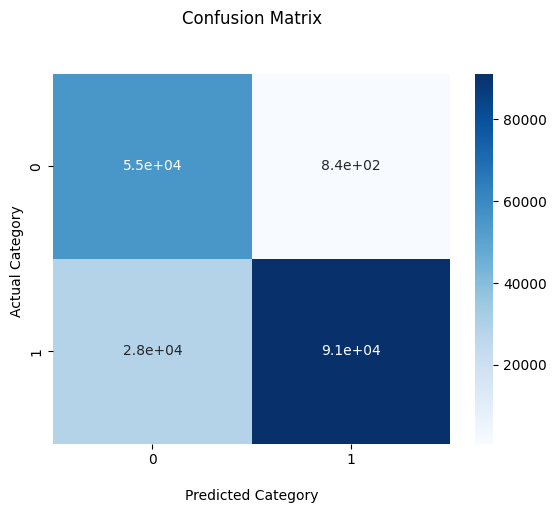

In [ ]:
# Evaluate the model on the test set
y_pred_proba = model_ann.predict(x_test)
prediction_ann = (y_pred_proba > 0.5).astype(int)

# Calculate and print metrics
acc_ann = accuracy_score(y_test, prediction_ann)
print('Accuracy: ', accuracy_score(y_test, prediction_ann))
print(classification_report(y_test, prediction_ann))

cm = confusion_matrix(y_test, prediction_ann)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

5480/5480 [==============================] - 13s 2ms/step
Accuracy:  0.8531376004471287
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81     56000
         1.0       0.99      0.79      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.89      0.85    175341
weighted avg       0.90      0.85      0.86    175341

[[55312   688]
 [25063 94278]]


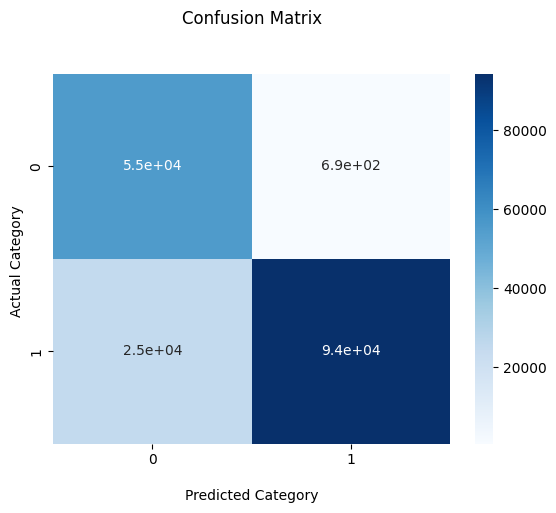

In [ ]:
# Evaluate the model on the test set
y_pred_proba = model_cnn.predict(x_test)
prediction_cnn = (y_pred_proba > 0.5).astype(int)

# Calculate and print metrics
acc_cnn = accuracy_score(y_test, prediction_cnn)
print('Accuracy: ', accuracy_score(y_test, prediction_cnn))
print(classification_report(y_test, prediction_cnn))

cm = confusion_matrix(y_test, prediction_cnn)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [ ]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

Accuracy:  0.7461574874102463
              precision    recall  f1-score   support

         0.0       0.56      0.92      0.70     56000
         1.0       0.94      0.67      0.78    119341

    accuracy                           0.75    175341
   macro avg       0.75      0.79      0.74    175341
weighted avg       0.82      0.75      0.75    175341

[[51273  4727]
 [39782 79559]]


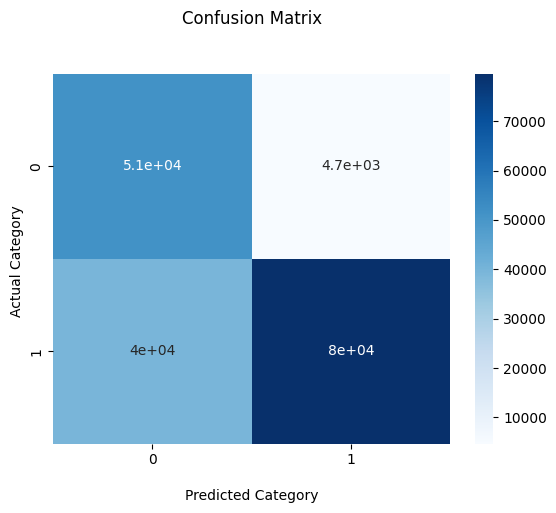

In [ ]:
prediction_nb = model_nb.predict(x_test)

# Calculate and print metrics
acc_nb = accuracy_score(y_test, prediction_nb)
print('Accuracy: ', accuracy_score(y_test, prediction_nb))
print(classification_report(y_test, prediction_nb))
cm = confusion_matrix(y_test, prediction_nb)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [ ]:
model_rf  = RandomForestClassifier().fit(x_train,y_train)

Accuracy:  0.8863072527246908
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85     56000
         1.0       0.99      0.84      0.91    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341

[[ 54614   1386]
 [ 18549 100792]]


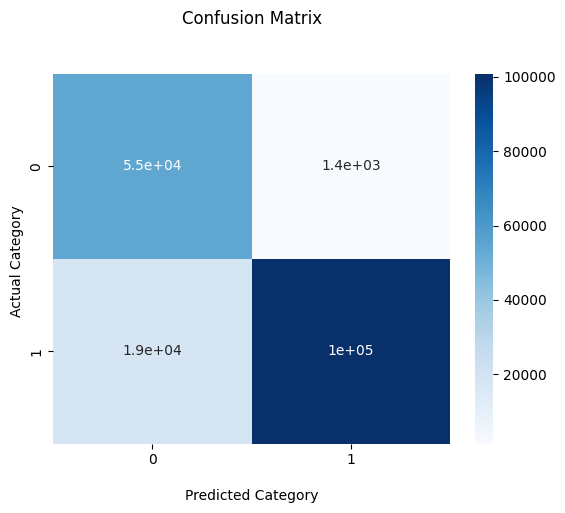

In [ ]:
prediction_rf = model_rf.predict(x_test)

# Calculate and print metrics
acc_rf = accuracy_score(y_test, prediction_rf)
print('Accuracy: ', accuracy_score(y_test, prediction_rf))
print(classification_report(y_test, prediction_rf))
cm = confusion_matrix(y_test, prediction_rf)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [ ]:
model_knn = KNeighborsClassifier().fit(x_train, y_train)

Accuracy:  0.851010317039369
              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81     56000
         1.0       0.98      0.80      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.88      0.84    175341
weighted avg       0.89      0.85      0.86    175341

[[54282  1718]
 [24406 94935]]


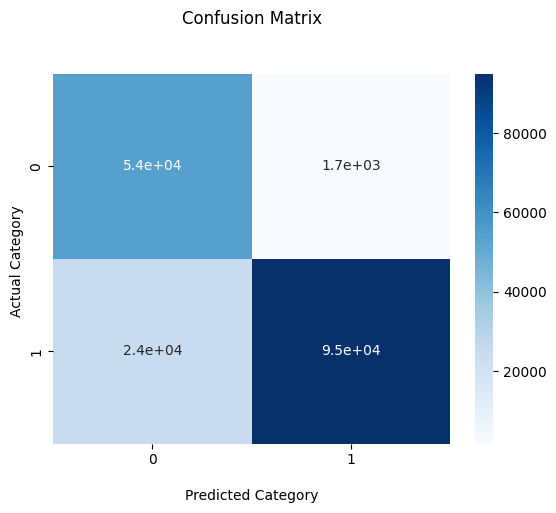

In [ ]:
model_knn = model_knn.predict(x_test)

# Calculate and print metrics
acc_knn = accuracy_score(y_test, model_knn)
print('Accuracy: ', accuracy_score(y_test, model_knn))
print(classification_report(y_test, model_knn))
cm = confusion_matrix(y_test, model_knn)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [ ]:
models = pd.DataFrame({'Model':['CNN','ANN','Naive Bayes','Random Forest','KNN'],
                      'Score':[ acc_cnn,acc_ann,acc_nb,acc_rf,acc_knn]})

In [ ]:
models.sort_values(by='Score',ascending = False)

,Model,Score
3,Random Forest,0.886307
0,CNN,0.853138
4,KNN,0.851010
1,ANN,0.833673
2,Naive Bayes,0.746157


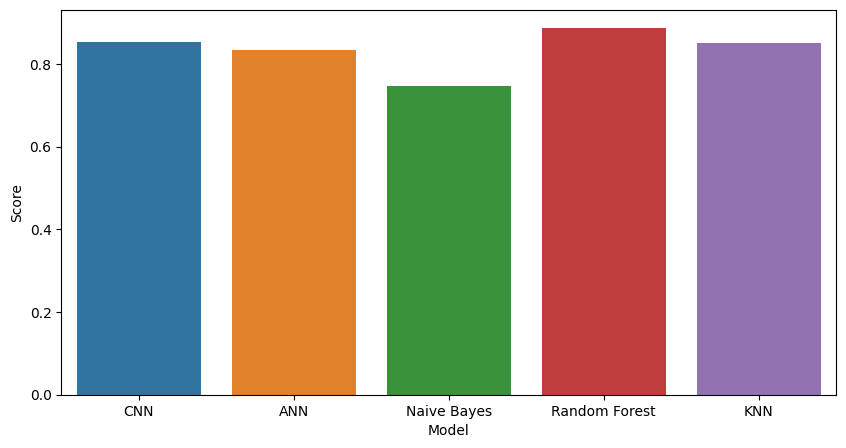

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'Model',y='Score',data = models)
plt.show()